# Day 5 : Data Loading and Manipulation and Visulatiozation

### You can use the following liberaries for your assignment:
> Numpy, Pandas, Matplotlib, Seaborn, LASIO, Welly

## Kindly load the las file of Exported.csv file from the data folder
## Perform the below Tasks:

>1. Investigate the component of the data file (number of columns , numbers of observations, Null values, normal statistics) 
2. Plot the null values as bars
3. Fill in null values using three different methods.
4. Create three facies Log for with 3 different scenarios.
5. Plot the three Facies scenarios vs Depth


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import lasio
import welly

from IPython.display import display

In [2]:
df = pd.read_csv("C:/Users/HP/Documents/GitHub/GeoML-2.0/10DaysChallenge/Dutch_F3_Logs/Exported.csv", delimiter=',')
display(df)

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE,MD,VP
0,48.0000,NaN,524.0485,NaN,3820257.00,-455.6956,NaN,48.0000,1.596514e+07
1,48.1500,NaN,524.0410,NaN,3820311.75,-455.6956,NaN,48.1500,1.596491e+07
2,48.3000,NaN,524.0336,NaN,3820366.25,-455.6956,NaN,48.3000,1.596468e+07
3,48.4500,NaN,524.0262,NaN,3820419.75,-455.6956,NaN,48.4500,1.596446e+07
4,48.6000,NaN,524.0190,NaN,3820472.25,-455.6956,NaN,48.6000,1.596424e+07
...,...,...,...,...,...,...,...,...,...
9675,1499.2500,1787.5444,532.1727,27.6273,3359011.00,-239115.9375,NaN,1499.2500,1.621264e+07
9676,1499.4000,1814.1691,534.8610,28.5281,3391772.00,-239115.9375,NaN,1499.4000,1.629454e+07
9677,1499.5500,1861.6497,537.1902,28.5813,3465524.00,-239115.9375,NaN,1499.5500,1.636550e+07
9678,1499.7001,1880.3978,537.2630,28.5813,3499957.75,-239115.9375,NaN,1499.7001,1.636772e+07


In [3]:
#1) Data Investigation

display('Col, Rows',df.shape)
display('info',df.info())
display('normal statistics',df.describe())
display('Null values',df.isna().sum())
display('Null values%',df.isna().sum()/ df.shape[0] *100)

'Col, Rows'

(9680, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   9680 non-null   float64
 1   RHOB    8253 non-null   float64
 2   DT      9680 non-null   float64
 3   GR      9666 non-null   float64
 4   AI      9680 non-null   float64
 5   AI_REL  9680 non-null   float64
 6   PHIE    4906 non-null   float64
 7   MD      9680 non-null   float64
 8   VP      9680 non-null   float64
dtypes: float64(9)
memory usage: 680.8 KB


'info'

None

'normal statistics'

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE,MD,VP
count,9680.000000,8253.000000,9680.000000,9666.000000,9.680000e+03,9680.000000,4906.000000,9680.000000,9.680000e+03
mean,773.925016,1975.091074,495.026839,46.613531,4.078518e+06,5193.728898,0.304522,773.925016,1.508099e+07
std,419.177962,294.677828,50.861145,23.484662,8.776878e+05,193455.679167,0.064282,419.177962,1.549485e+06
min,48.000000,1350.444700,368.114700,1.339200,2.035267e+06,-617319.750000,0.203900,48.000000,1.121461e+07
25%,410.962500,1812.400000,460.693600,23.527000,3.658766e+06,-95113.828100,0.257900,410.962500,1.403503e+07
50%,773.925000,2096.345000,505.393400,48.765250,3.953107e+06,2603.301500,0.283000,773.925000,1.539681e+07
75%,1136.887575,2210.906000,521.642300,63.162950,4.782770e+06,93553.453100,0.339800,1136.887575,1.589183e+07
max,1499.850100,2346.629200,667.920800,129.177300,5.983779e+06,629867.000000,0.709000,1499.850100,2.034821e+07


'Null values'

DEPTH        0
RHOB      1427
DT           0
GR          14
AI           0
AI_REL       0
PHIE      4774
MD           0
VP           0
dtype: int64

'Null values%'

DEPTH      0.000000
RHOB      14.741736
DT         0.000000
GR         0.144628
AI         0.000000
AI_REL     0.000000
PHIE      49.318182
MD         0.000000
VP         0.000000
dtype: float64

<AxesSubplot:title={'center':'Missing Values Comparison'}>

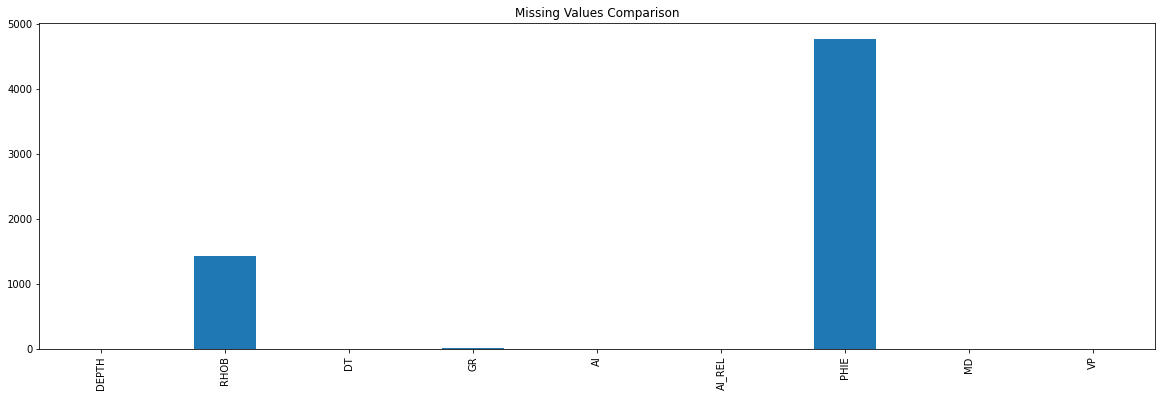

In [5]:
#2. Plot the null values as bars
df.isnull().sum().plot(kind = 'bar', title = 'Missing Values Comparison', figsize=(20,6))

In [7]:
#3. Fill in null values using three different methods.
#Making 3 copies for three methods of filling null values
df_copy_a =df.copy()
df_copy_b =df.copy()
df_copy_c =df.copy()

#Method A: Filling Null values by linear interpolation
df_copy_a=df_copy_a.interpolate(method ='linear', limit_direction ='backward')
display('after filling nans',df_copy_a)

#Method b: Dropping Null values
df_copy_b.dropna(inplace=True)
print('Dataframe after removing nans =',df_copy_b.shape)
print('=' *100)
print('This dataset has {0} rows and {1} columns'.format(df_copy_b.shape[0],df_copy_b.shape[1]))
display('after removing nans',df_copy_b)

#Method c: Fill in Null values with mean value
df_copy_c=df.fillna(df.mean())
display('after filling nans with mean value',df_copy_c)

'after filling nans'

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE,MD,VP
0,48.0000,1998.9065,524.0485,3.0703,3820257.00,-455.6956,0.4702,48.0000,1.596514e+07
1,48.1500,1998.9065,524.0410,3.0703,3820311.75,-455.6956,0.4702,48.1500,1.596491e+07
2,48.3000,1998.9065,524.0336,3.0703,3820366.25,-455.6956,0.4702,48.3000,1.596468e+07
3,48.4500,1998.9065,524.0262,3.0703,3820419.75,-455.6956,0.4702,48.4500,1.596446e+07
4,48.6000,1998.9065,524.0190,3.0703,3820472.25,-455.6956,0.4702,48.6000,1.596424e+07
...,...,...,...,...,...,...,...,...,...
9675,1499.2500,1787.5444,532.1727,27.6273,3359011.00,-239115.9375,NaN,1499.2500,1.621264e+07
9676,1499.4000,1814.1691,534.8610,28.5281,3391772.00,-239115.9375,NaN,1499.4000,1.629454e+07
9677,1499.5500,1861.6497,537.1902,28.5813,3465524.00,-239115.9375,NaN,1499.5500,1.636550e+07
9678,1499.7001,1880.3978,537.2630,28.5813,3499957.75,-239115.9375,NaN,1499.7001,1.636772e+07


Dataframe after removing nans = (4906, 9)
This dataset has 4906 rows and 9 columns


'after removing nans'

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE,MD,VP
3308,544.2000,1897.7505,521.8398,46.3490,3636762.00,188158.9844,0.4702,544.2000,1.589785e+07
3309,544.3500,1950.1143,519.4737,46.2888,3754059.75,188158.9844,0.4375,544.3500,1.582577e+07
3310,544.5000,1968.0576,518.0292,46.2888,3799134.75,188158.9844,0.4262,544.5000,1.578176e+07
3311,544.6500,1984.5618,525.4709,49.1604,3776786.25,188158.9844,0.4159,544.6500,1.600847e+07
3312,544.8000,1974.3237,537.0573,56.4415,3676511.00,188158.9844,0.4223,544.8000,1.636145e+07
...,...,...,...,...,...,...,...,...,...
8209,1279.3501,1994.3097,502.1868,114.1797,3971229.75,163143.7500,0.4098,1279.3501,1.529912e+07
8210,1279.5000,1991.3125,500.5999,114.1797,3977871.25,163143.7500,0.4117,1279.5000,1.525078e+07
8211,1279.6500,2010.7062,498.9934,113.0370,4029565.00,163143.7500,0.3996,1279.6500,1.520183e+07
8212,1279.8000,2003.3726,499.3086,112.5636,4012318.25,163143.7500,0.4041,1279.8000,1.521144e+07


'after filling nans with mean value'

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE,MD,VP
0,48.0000,1975.091074,524.0485,46.613531,3820257.00,-455.6956,0.304522,48.0000,1.596514e+07
1,48.1500,1975.091074,524.0410,46.613531,3820311.75,-455.6956,0.304522,48.1500,1.596491e+07
2,48.3000,1975.091074,524.0336,46.613531,3820366.25,-455.6956,0.304522,48.3000,1.596468e+07
3,48.4500,1975.091074,524.0262,46.613531,3820419.75,-455.6956,0.304522,48.4500,1.596446e+07
4,48.6000,1975.091074,524.0190,46.613531,3820472.25,-455.6956,0.304522,48.6000,1.596424e+07
...,...,...,...,...,...,...,...,...,...
9675,1499.2500,1787.544400,532.1727,27.627300,3359011.00,-239115.9375,0.304522,1499.2500,1.621264e+07
9676,1499.4000,1814.169100,534.8610,28.528100,3391772.00,-239115.9375,0.304522,1499.4000,1.629454e+07
9677,1499.5500,1861.649700,537.1902,28.581300,3465524.00,-239115.9375,0.304522,1499.5500,1.636550e+07
9678,1499.7001,1880.397800,537.2630,28.581300,3499957.75,-239115.9375,0.304522,1499.7001,1.636772e+07


Text(0, 0.5, 'DEPTH')

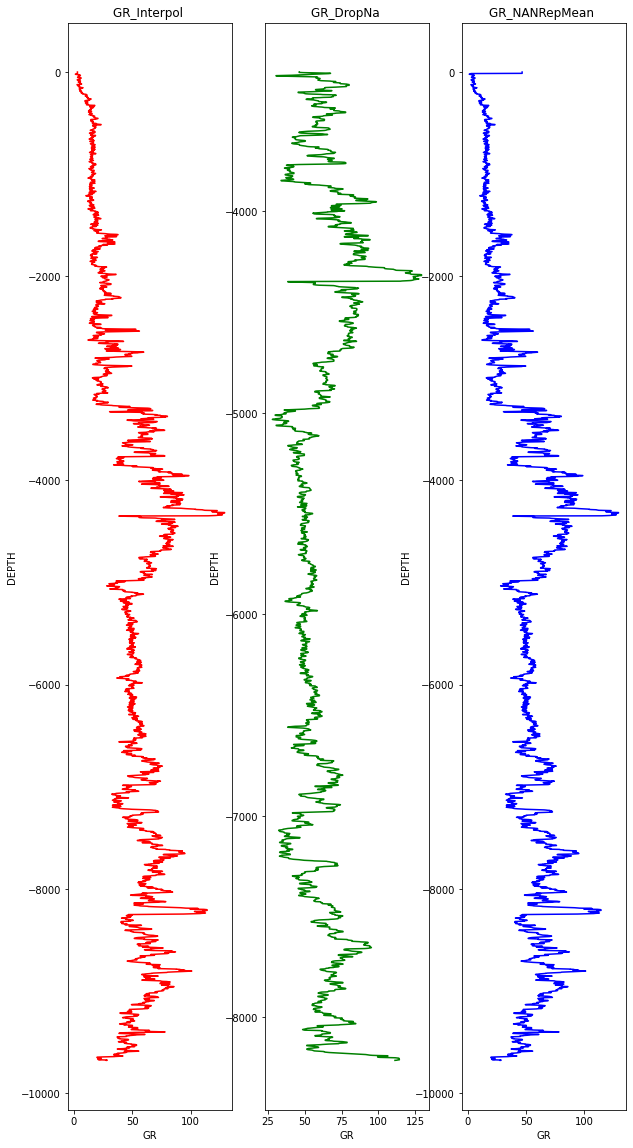

In [16]:
#4. Create three facies Log for the 3 different scenarios.
#Investigating GR
plt.figure(figsize=(10,20))

# GR_Interpol plot:
plt.subplot(1, 3, 1)
plt.plot(df_copy_a.GR, df_copy_a.index*-1, label = 'GR_Interpol', c = 'r')
plt.title('GR_Interpol ')
plt.xlabel('GR')
plt.ylabel('DEPTH')


# GR_DropNa:
plt.subplot(1, 3, 2)
plt.plot(df_copy_b.GR, df_copy_b.index*-1, label = 'GR_DropNa', c = 'g')
plt.title('GR_DropNa ')
plt.xlabel('GR')
plt.ylabel('DEPTH')

# GR_NANRepMean:
plt.subplot(1, 3, 3)
plt.plot(df_copy_c.GR, df_copy_c.index*-1, label = 'GR_NANRepMean', c = 'b')
plt.title('GR_NANRepMean ')
plt.xlabel('GR')
plt.ylabel('DEPTH')


In [29]:
#(A)
def shale(A):
    return 1 if A <50 else 0

    
df_copy_a['Facies']= df_copy_a['GR'].apply(shale)
df_copy_a.sample(5)


,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE,MD,VP,Shale/SD,Facies
7035,1103.25,2280.6370,403.7039,50.1766,5649279.00,141797.9688,0.2308,1103.25,1.229884e+07,0,0
5519,875.85,2215.1965,455.6008,51.6065,4862143.50,2695.2800,0.2718,875.85,1.387988e+07,0,0
6726,1056.90,2277.8000,394.1312,69.6631,5779302.00,190371.3750,0.2327,1056.90,1.200721e+07,0,0
2405,408.75,1554.7113,501.8089,29.2402,3098236.25,-36885.0078,0.4702,408.75,1.528761e+07,1,1
9086,1410.90,2127.3240,499.8633,61.5045,4255811.50,18078.9648,NaN,1410.90,1.522834e+07,0,0


In [30]:
#(B)
def shale(B):
    return 1 if B <50 else 0

    
df_copy_b['Facies']= df_copy_b['GR'].apply(shale)

#(C)
def shale(C):
    return 1 if C <50 else 0

    
df_copy_c['Facies']= df_copy_c['GR'].apply(shale)

In [40]:
df_copy_a=df.df_copy_a()
display(df_copy_a)

AttributeError: 'DataFrame' object has no attribute 'df_copy_a'

Text(0, 0.5, 'DEPTH')

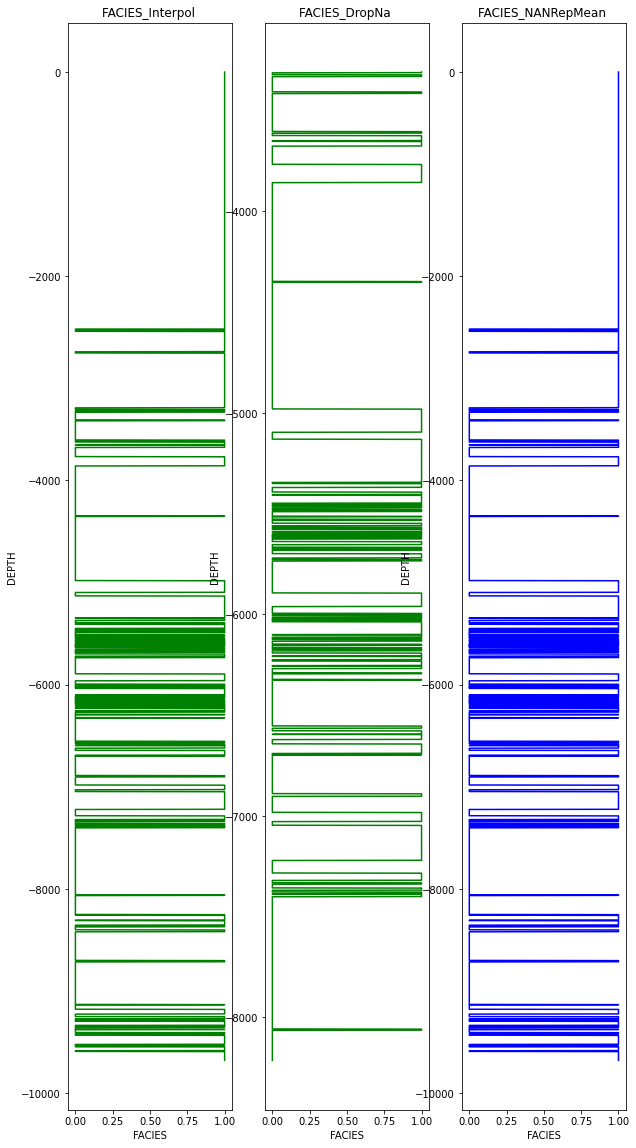

In [46]:
#5. Plot the three Facies scenarios vs Depth
plt.figure(figsize=(10,20))

# FACIES_Interpol plot:
plt.subplot(1, 3, 1)
plt.plot(df_copy_a.Facies, df_copy_a.index*-1, label = 'FACIES_Interpol', c = 'g')
plt.title('FACIES_Interpol ')
plt.xlabel('FACIES')
plt.ylabel('DEPTH')


# FACIES_DropNa:
plt.subplot(1, 3, 2)
plt.plot(df_copy_b.Facies, df_copy_b.index*-1, label = 'FACIES_DropNa', c = 'g')
plt.title('FACIES_DropNa ')
plt.xlabel('FACIES')
plt.ylabel('DEPTH')


# FACIES_NANRepMean:
plt.subplot(1, 3, 3)
plt.plot(df_copy_c.Facies, df_copy_c.index*-1, label = 'FACIES_NANRepMean', c = 'b')
plt.title('FACIES_NANRepMean ')
plt.xlabel('FACIES')
plt.ylabel('DEPTH')


Text(0, 0.5, 'DEPTH')

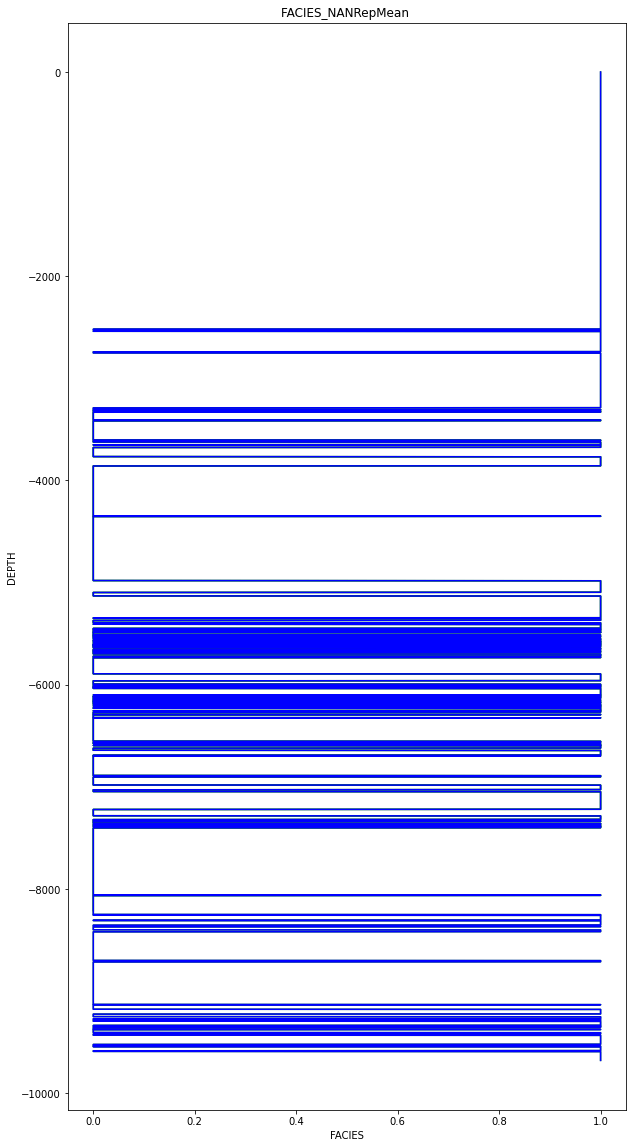

In [47]:
#5. Plot the three Facies scenarios vs Depth (One Plot)
plt.figure(figsize=(10,20))

# FACIES_Interpol plot:
plt.subplot(1, 1, 1)
plt.plot(df_copy_a.Facies, df_copy_a.index*-1, label = 'FACIES_Interpol', c = 'g')
plt.title('FACIES_Interpol ')
plt.xlabel('FACIES')
plt.ylabel('DEPTH')


# FACIES_DropNa:
plt.subplot(1, 1, 1)
plt.plot(df_copy_b.Facies, df_copy_b.index*-1, label = 'FACIES_DropNa', c = 'g')
plt.title('FACIES_DropNa ')
plt.xlabel('FACIES')
plt.ylabel('DEPTH')


# FACIES_NANRepMean:
plt.subplot(1, 1, 1)
plt.plot(df_copy_c.Facies, df_copy_c.index*-1, label = 'FACIES_NANRepMean', c = 'b')
plt.title('FACIES_NANRepMean ')
plt.xlabel('FACIES')
plt.ylabel('DEPTH')
